##**Trabalho Prático 2**

##Bárbara Faria (A85774), Bruna Araújo (A84408) e Tiago Lima (A85126)

##2. Circuitos Booleanos

A resolução efetuada neste exercício não corresponde ao pedido no enunciado. Foi-nos difícil aplicar o que foi lecionado, mas tentamos dar o nosso melhor com as ferramentas disponíveis.

In [ ]:
import networkx as nx

In [ ]:
!pip install ortools

##Explicação do Exercício

Tentamos resolver o circuito "ao contrário", isto é, começando no output final (que idealmente será 1) e acabando nos inputs iniciais.

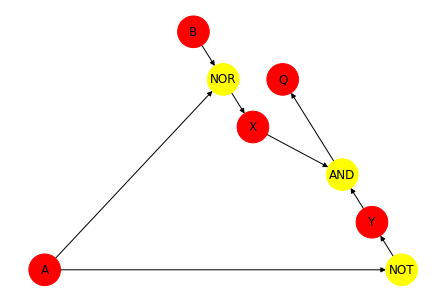

In [ ]:
#Iniciar um circuito orientado
#Este grafo terá wires e gates
circuit = nx.DiGraph()
circuit.add_node("A")
circuit.add_node("B")
circuit.add_node("X")
circuit.add_node("Y")
circuit.add_node("Q")
circuit.add_node("f",gate="AND")
circuit.add_node("g",gate="NOR")
circuit.add_node("h",gate="NOT")
circuit.add_edge("A","h")
circuit.add_edge("A","g")
circuit.add_edge("B","g")
circuit.add_edge("h","Y")
circuit.add_edge("Y","f")
circuit.add_edge("g","X")
circuit.add_edge("X","f")
circuit.add_edge("f","Q")

#nx.draw(circuit,with_labels=True,node_size=1000)
def desenha(circ):
  nx.draw(circ, with_labels = True, labels = {n: circ.nodes[n]['gate'] if 'gate' in circ.nodes[n] else n for n in circ}, 
          node_size = 1000, node_color = ['yellow' if 'gate' in circ.nodes[n] else 'red' for n in circ], pos = nx.planar_layout(circ))

desenha(circuit)

In [ ]:
from ortools.linear_solver import pywraplp

circ_logic = pywraplp.Solver.CreateSolver('SCIP')

#O gate AND recebe dois wires como input: o X e o Y
x = {}
for i in range(2):
  x[i] = circ_logic.BoolVar('x[%i]' % (i))

#Restrições do operador AND
#Output desejado é 1
for i in range(2):
  circ_logic.Add(x[i] >= 1)
circ_logic.Add(sum([x[i] for i in range(2)]) <= (1 + 2)-1)

#Mais uma vez, o output desejado será 1
#Vamos guardar os valores de X e Y, uma vez que estes são output de outros gates
circ_logic.Minimize(1)
status = circ_logic.Solve()
if status == pywraplp.Solver.OPTIMAL:
    print("Inputs do Gate AND:")
    X = round(x[0].solution_value())
    print ("X = ", round(x[0].solution_value()))
    Y = round(x[1].solution_value())
    print ("Y = ", round(x[1].solution_value()))

#O gate NOT recebe um wire como input: o A
x = {}
for i in range(1):
  x[i] = circ_logic.BoolVar('x[%i]' % (i))

#Restrições do operador NOT
#Output desejado é 1 (Y = 1)
circ_logic.Add(Y + x[0] == 1)

#Mais uma vez, o output desejado será 1 (Y = 1)
circ_logic.Minimize(Y)
status = circ_logic.Solve()
if status == pywraplp.Solver.OPTIMAL:
    print("\nInputs do Gate NOT:")
    print ("A = ", round(x[0].solution_value()))

#O gate NOR recebe dois wires como input: o A e o B
x = {}
for i in range(2):
  x[i] = circ_logic.BoolVar('x[%i]' % (i))

#Restrições do operador NOR
#Output desejado é 1 (X = 1)
for i in range(2):
  circ_logic.Add(X + x[i] <= 1)
circ_logic.Add(1 <= X + (sum([x[i] for i in range(2)])))

#Mais uma vez, o output desejado será 1 (X = 1)
circ_logic.Minimize(X)
status = circ_logic.Solve()
if status == pywraplp.Solver.OPTIMAL:
    print("\nInputs do Gate NOR:")
    A = round(x[0].solution_value())
    print ("A = ", round(x[0].solution_value()))
    B = round(x[1].solution_value())
    print ("B = ", round(x[0].solution_value()))

print("\nInputs aceites pelo circuito são (por exemplo):")
print ("A = ", A)
print ("B = ", B)

Inputs do Gate AND:
X =  1
Y =  1

Inputs do Gate NOT:
A =  0

Inputs do Gate NOR:
A =  0
B =  0

Inputs aceites pelo circuito são (por exemplo):
A =  0
B =  0


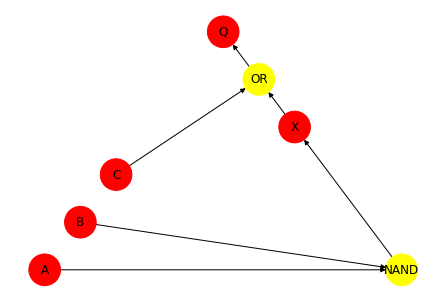

In [ ]:
#Iniciar um circuito orientado
#Este grafo terá wires e gates
circuit2 = nx.DiGraph()
circuit2.add_node("A")
circuit2.add_node("B")
circuit2.add_node("C")
circuit2.add_node("X")
circuit2.add_node("Q")
circuit2.add_node("f",gate="NAND")
circuit2.add_node("g",gate="OR")
circuit2.add_edge("A","f")
circuit2.add_edge("B","f")
circuit2.add_edge("f","X")
circuit2.add_edge("X","g")
circuit2.add_edge("C","g")
circuit2.add_edge("g","Q")

#nx.draw(circuit,with_labels=True,node_size=1000)
def desenha(circ):
  nx.draw(circ, with_labels = True, labels = {n: circ.nodes[n]['gate'] if 'gate' in circ.nodes[n] else n for n in circ}, 
          node_size = 1000, node_color = ['yellow' if 'gate' in circ.nodes[n] else 'red' for n in circ], pos = nx.planar_layout(circ))

desenha(circuit2)

In [ ]:
#O gate OR recebe dois wires como input: o C e o X
x = {}
for i in range(2):
  x[i] = circ_logic.BoolVar('x[%i]' % (i))

#Restrições do operador OR
#Output desejado é 1
for i in range(2):
  circ_logic.Add(x[i] <= 1)
circ_logic.Add(1 <= (sum([x[i] for i in range(2)])))

#Mais uma vez, o output desejado será 1
#Vamos guardar os valores de X, uma vez que este é output de outro gate
circ_logic.Minimize(1)
status = circ_logic.Solve()
if status == pywraplp.Solver.OPTIMAL:
    print("Inputs do Gate OR:")
    C = round(x[0].solution_value())
    print ("C = ", round(x[0].solution_value()))
    X = round(x[1].solution_value())
    print ("X = ", round(x[1].solution_value()))

#O gate NAND recebe dois wires como input: o A e o B
x = {}
for i in range(2):
  x[i] = circ_logic.BoolVar('x[%i]' % (i))

#Restrições do operador NAND
#Output desejado é 0 (X = 0)
for i in range(2):
  circ_logic.Add((X + x[i]) >= 1)
circ_logic.Add(X + (sum([x[i] for i in range(2)])) <= 2)

#Mais uma vez, o output desejado será 0 (X = 0)
circ_logic.Minimize(X)
status = circ_logic.Solve()
if status == pywraplp.Solver.OPTIMAL:
    print("\nInputs do Gate NAND:")
    A = round(x[0].solution_value())
    print ("A = ", round(x[0].solution_value()))
    B = round(x[1].solution_value())
    print ("B = ", round(x[1].solution_value()))

print("\nInputs aceites pelo circuito são (por exemplo):")
print ("A = ", A)
print ("B = ", B)
print ("C = ", C)

Inputs do Gate OR:
C =  1
X =  0

Inputs do Gate NAND:
A =  1
B =  1

Inputs aceites pelo circuito são (por exemplo):
A =  1
B =  1
C =  1
